In [1]:
# Installing and importing the necessary libraries
!pip install fastai2 --quiet
!pip install kaggle --quiet
!pip install datasets
!pip install transformers sentencepiece
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.0
    Uninstalling huggingface-hub-0.19.0:
      Successfully uninstalled huggingface-hub-0.19

In [3]:
from fastai.text.all import *


from pathlib import Path
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import torch
print("Cuda available" if torch.cuda.is_available() is True else "CPU")
print("PyTorch version: ", torch.__version__)

Cuda available
PyTorch version:  2.1.0+cu118


In [4]:
path = Path('imdb')

In [5]:
train_df = pd.read_csv(path/'train.csv', nrows=10000)
test_df = pd.read_csv(path/'test.csv', nrows=10000)

In [ ]:
train_df.head()

In [6]:
len(train_df), len(test_df)

(10000, 10000)

In [7]:
train_df['label'] = (train_df['sentiment'] == 'pos')

In [ ]:
train_df['label'].value_counts()

In [ ]:
train_df[['text','label']].sample(10)

In [8]:
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'])

In [11]:
txts = L([i for i in train_df['text']])

In [12]:
# Setting up a tokenizer on the entire dataframe 'train'
tok = Tokenizer.from_df(train_df)
tok.setup(train_df)

toks = txts.map(tok)
toks[0]

(#279) ['xxbos','xxmaj','my','friends','and','i','were','just','discussing','how'...]

In [13]:
tok.encodes(toks[0])

(#279) ['xxbos','xxmaj','my','friends','and','i','were','just','discussing','how'...]

In [14]:
tok.decode(toks[0])

'xxbos xxmaj my friends and i were just discussing how frustrated we are with the way movies and especially romantic comedy \'s are being made . xxmaj we feel offended by the schlock that xxmaj hollywood is serving up these days as they act like all is well . \n\n xxmaj well all is not well … with the exception of a few bright spots , like this movie . xxmaj it does n\'t have the big name actors , the big budget , i do n\'t think it had a big release ( i rented from xxmaj hollywood xxmaj video ) it did n\'t really have anything that most big budget romantic comedy \'s have . \n\n xxmaj but it did have what most of those lack . xxmaj it had great chemistry between the love interests , " parker " ( jonathan xxmaj schaech ) and " sam " ( alison xxmaj eastwood ) . xxmaj their love story was n\'t forced on us like so many . xxmaj the director took his time to allow these characters to truly get to know each other . xxmaj their story reminded me of one of my favorites , " tootsie " . \n\n xx

In [15]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
nums[0][:10]

TensorText([   2,    8,   76,  391,   12,   19,   86,   59, 5464,  105])

In [16]:
num.encodes(toks[0])

TensorText([    2,     8,    76,   391,    12,    19,    86,    59,  5464,
              105,  4070,    92,    39,    29,     9,   116,   121,    12,
              274,   732,   226,    23,    39,   136,   112,    10,     8,
               92,   247,  5647,    48,     9,  5648,    21,     8,   377,
               16,  5000,    74,   156,   528,    27,    47,   532,    53,
               46,    16,    91,    10,    26,     8,    91,    46,    16,
               38,    91,    79,    29,     9,  1241,    14,    13,   192,
             1893,  2861,    11,    53,    20,    30,    10,     8,    17,
               93,    36,    42,     9,   216,   420,   171,    11,     9,
              216,   373,    11,    19,    60,    36,   122,    17,    85,
               13,   216,   832,    37,    19,  1659,    52,     8,   377,
                8,   401,    35,    17,    90,    36,    82,    42,   255,
               21,   111,   216,   373,   732,   226,    23,    42,    10,
               26,     8,

In [17]:
num.decode(nums[0][:10])

(#10) ['xxbos','xxmaj','my','friends','and','i','were','just','discussing','how']

In [18]:
df_lm = pd.concat([train_df, test_df], axis=0)[['text']]
df_lm.head()

,text
455,"My friends and I were just discussing how frustrated we are with the way movies and especially romantic comedy's are being made. We feel offended by the schlock that Hollywood is serving up these days as they act like all is well.<br /><br />Well all is not well...with the exception of a few bright spots, like this movie. It doesn't have the big name actors, the big budget, I don't think it had a big release (I rented from Hollywood Video) it didn't really have anything that most big budget romantic comedy's have.<br /><br />But it did have what most of those lack. It had great chemistry b..."
1394,"Slow and nice images changed one another, with sometimes annoying music (you know Bjork) in background, for the first 75% of the movie. If you did not have enough sleep, that's a good time. <br /><br />But, in the last 20% of the movie director decides to bring idea of re-birth, re-incarnation or else, through S&M images: ""spiritual lovers"" are cutting each others bodies with knives. For me it was very much disturbing and actually changed general impression of blend of abstract art and images of modern Japanese mystery. <br /><br />Operator and director are great, but weird. <br /><br />Di..."
1158,"Disappointing film. Performance of actors is weak. Sets are fine, could have been better. The story is also weak. Battle sequences are awful. Sounds and quality of film are trashy. The history of Kazakh people was told very poorly. This film should have included more Kazakh actors, in leading roles. And also should have been in Kazakh language. Kuno Bekker and Jay Hernandez are Hispanic origins. I don't get it. Since when Hispanic people play Turkic-Mongolian people. This film is shame of Kazakh cinema. Rustam Ibragimbekov disappointed me. He is one of the finest filmmakers in the world. C..."
6359,"I liked the first movie, but this is a textbook example of a sequel that would have been better of left on the drawing board. The general idea in the first movie was, if not great, then at least very interesting. This sequel tries to build upon the idea and the characters from the first movie, and though Christopher Walken is still good as Gabriel, the whole idea suddenly gets a bit ridiculous. If you haven't seen any of these movies, then get the first movie and forget about the sequels, they can take away all of the joy from the original."
3911,"This was the third Muppet movie and the last one Jim Henson was around to take part in the making of before his premature death in 1990. The first three films starring the famous characters were all made and released into theatres before I was born. I originally saw the first and second installments in the original trilogy, ""The Muppet Movie"" and ""The Great Muppet Caper"", around the mid-nineties, as a kid, but didn't see this third one, ""The Muppets Take Manhattan"", until April 2007. This was shortly after I had seen its two predecessors and 1996's ""Muppet Treasure Island"" for the first ti..."


In [19]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),
    get_x=ColReader('text'),
    splitter=RandomSplitter(0.1)
    # using only 10% of entire comments data for validation inorder to learn more
)

In [21]:
dls_lm = dls_lm.dataloaders(df_lm, bs=16, seq_len=72)

In [22]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos i did n't have xxup huge expectations for this film when renting it for $ 1 at the video store , but the box at least showed a little promise with its "" killer cut "" of "" more gore ! more sex ! "" xxmaj ca n't go wrong there ! xxmaj well … needless to say , the box is a fraud . xxmaj how in the hades did","i did n't have xxup huge expectations for this film when renting it for $ 1 at the video store , but the box at least showed a little promise with its "" killer cut "" of "" more gore ! more sex ! "" xxmaj ca n't go wrong there ! xxmaj well … needless to say , the box is a fraud . xxmaj how in the hades did actors"
1,"xxmaj vincenzo - if xxmaj kolchak 's always raving about monsters , and xxmaj vincenzo never believes it … well , then , why does n't xxmaj vincenzo fire xxmaj kolchak , or have him committed ? xxmaj that 's what any normal boss would do . xxmaj but the series eschews such realism and prefers to keep xxmaj vincenzo and xxmaj kolchak as comical antagonists . xxmaj as a result ,","vincenzo - if xxmaj kolchak 's always raving about monsters , and xxmaj vincenzo never believes it … well , then , why does n't xxmaj vincenzo fire xxmaj kolchak , or have him committed ? xxmaj that 's what any normal boss would do . xxmaj but the series eschews such realism and prefers to keep xxmaj vincenzo and xxmaj kolchak as comical antagonists . xxmaj as a result , many"
2,"with another of the young scientists in the team , he finally snaps . xxmaj the movie then turns into a hybrid of "" alien "" and a slasher flick , but that 's not saying it 's a bad turn . xxmaj there are scares and chills and the movie moves at a nice pace . xxmaj the special effects are top notch ( a quality always prevalent in xxup all","another of the young scientists in the team , he finally snaps . xxmaj the movie then turns into a hybrid of "" alien "" and a slasher flick , but that 's not saying it 's a bad turn . xxmaj there are scares and chills and the movie moves at a nice pace . xxmaj the special effects are top notch ( a quality always prevalent in xxup all of"


In [ ]:
# Saving the dataloader

# torch.save(dls_lm, path/'imdb_dls_lm.pkl')

In [ ]:
# Loading the Dataloaders

# dls_lm = torch.load(path/'imdb_dls_lm.pkl')

In [24]:
learn = language_model_learner(
    dls_lm, AWD_LSTM,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [25]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(33320, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(33320, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0-2): 3 x RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=33320, bias=True)
    (output_dp): RNNDropout()
  )
)

SuggestedLRs(valley=0.0030199517495930195)

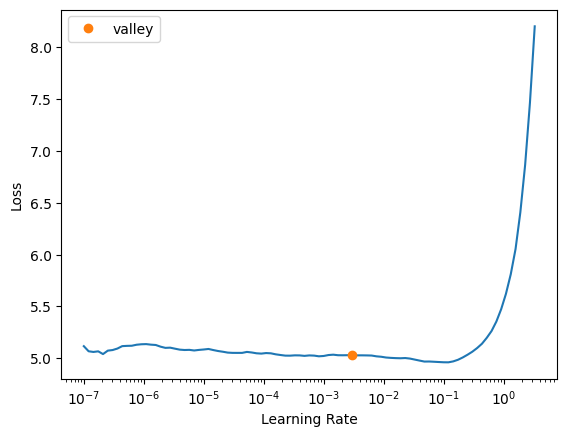

In [26]:
learn.lr_find()

In [28]:
learn.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.442487,4.208706,0.276388,67.269463,05:43


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.167933,4.038367,0.288909,56.733608,06:01
1,4.145126,4.004840,0.292628,54.863068,06:00
2,4.042260,3.937674,0.300582,51.299156,06:02
3,3.881686,3.878461,0.305986,48.349731,06:00
4,3.781745,3.864134,0.308212,47.661961,05:59


In [29]:
# Saving the encoder

learn.save_encoder('finetuned')

In [33]:
blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader('sentiment'),
                splitter=RandomSplitter(0.2))

In [34]:
dls = dls.dataloaders(train_df, bs=16)

In [35]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj heavy - handed xxunk . xxmaj writers using characters as xxunk to speak for themselves . xxmaj predictable , plodding plot points ( say that five times fast ) . a child 's imitation of xxmaj britney xxmaj spears . xxmaj this film has all the earmarks of a xxmaj lifetime xxmaj special reject . \n\n i honestly believe that xxmaj jesus xxmaj xxunk and xxmaj julia xxmaj xxunk set out to create a thought - provoking , emotional film on a tough subject , exploring the idea that things are not always black and white , that one who is a criminal by definition is not necessarily a bad human being , and that there can be xxunk circumstances , especially when one puts the well - being of a child first . xxmaj however , their earnestness ends up being channeled into preachy dialogue and trite",neg
1,"xxbos i saw this movie during a xxmaj tolkien - themed xxmaj interim class during my sophomore year of college . i was seated unfortunately close to the screen and my professor chose me to serve as a whipping xxunk everyone else was laughing , but they were n't within constant eyesight . \n\n xxmaj let 's get it out of the way : the xxmaj peter xxmaj jackson ' lord of the xxmaj rings ' films do owe something to the xxmaj bakshi film . xxmaj in xxmaj jackson 's version of xxmaj the xxmaj fellowship of the xxmaj ring , for instance , the scene in which the xxmaj black xxmaj riders assault the empty inn beds is almost a complete carbon copy of the scene in xxmaj bakshi 's film , shot by shot . xxmaj you could call this plagiarism or homage , depending on your",neg
2,"xxbos xxmaj streisand fans only familiar with her work from the xxup funny xxup girl film onwards need to see this show to see what a brilliant performer xxmaj streisand xxup was - xxup before she achieved her goal of becoming a xxmaj movie xxmaj star . xxmaj there had never been a female singer quite like her ever before , and there never would be again ( sorry , xxmaj celine - only in your dreams ! ) , but never again would xxmaj streisand sing with the vibrancy , energy , and , above all , the xxup enthusiasm and xxup vulnerability with which she performs here - by the time she gets to that xxmaj central xxmaj park concert only 2 or 3 years later , she 'd been filming xxup funny xxup girl in xxmaj hollywood and her performing style has become less spontaneous and more",pos


In [36]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=[accuracy, FBeta(beta=1)]).to_fp16()
learn.load_encoder('finetuned')

In [37]:
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(33320, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(33320, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0-2): 3 x RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): B

In [38]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.371456,0.291657,0.875625,0.877989,00:36


In [39]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.300166,0.213864,0.907500,0.907615,00:56


In [40]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),3e-3))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.283150,0.225931,0.903750,0.906326,01:16
1,0.208220,0.228101,0.902500,0.901141,01:14
